In [239]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [240]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
# Import My own library for factor testing
import factorFilterFunctions as ff
#from config import *

In [242]:
%matplotlib inline

In [243]:
# Files to use 
filenamePrice='my_own_factor_AdjustedPriceForward.csv'
filenameST='LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday='LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag='LZ_GPA_SLCIND_STOP_FLAG.csv'
filenameIndu='LZ_GPA_INDU_ZX.csv'
filenameFCAP='LZ_GPA_VAL_A_FCAP.csv'
filenameAdjustFactor='LZ_GPA_CMFTR_CUM_FACTOR.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'

In [244]:
# Factors
# Value factor
filenamePE='LZ_GPA_VAL_PE.csv'  # 市盈率
filenamePB='LZ_GPA_VAL_PB.csv'  # 市净率
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%)
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%)
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%)
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%)
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动
filenameABORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv'

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'      # 三月换手率均值
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'                   # 非流动性因子


In [245]:
# Constants
path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HSIndex='000300.SH'

In [246]:
#
sololist=[filenameSKEW]
#
filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'TURNOVER_1M':filenameTURNOVER1M }

In [247]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]

In [248]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5][HSIndex]

In [249]:
LFCAPDF = np.log(ff.getData(filenameFCAP, timeStampNum, thresholdNum))

In [250]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [251]:
activeReturnData =ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = False)

In [252]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2006-11-30 00:00:00 268
2006-12-29 00:00:00 307
2007-01-31 00:00:00 277
2007-02-28 00:00:00 288
2007-03-30 00:00:00 269
2007-04-30 00:00:00 339
2007-05-31 00:00:00 303
2007-06-29 00:00:00 324
2007-07-31 00:00:00 281
2007-08-31 00:00:00 299
2007-09-28 00:00:00 317
2007-10-31 00:00:00 308
2007-11-30 00:00:00 301
2007-12-28 00:00:00 324
2008-01-31 00:00:00 316
2008-02-29 00:00:00 315
2008-03-31 00:00:00 299
2008-04-30 00:00:00 296
2008-05-30 00:00:00 308
2008-06-30 00:00:00 319
2008-07-31 00:00:00 270
2008-08-29 00:00:00 241
2008-09-26 00:00:00 259
2008-10-31 00:00:00 230
2008-11-28 00:00:00 253
2008-12-31 00:00:00 230
2009-01-23 00:00:00 211
2009-02-27 00:00:00 218
2009-03-31 00:00:00 227
2009-04-30 00:00:00 249
2009-05-27 00:00:00 237
2009-06-30 00:00:00 257
2009-07-31 00:00:00 240
2009-08-31 00:00:00 257
2009-09-30 00:00:00 250
2009-10-30 00:00:00 281
2009-11-30 00:00:00 288
2009-12-31 00:00:00 317
2010-01-29 00:00:00 296
2010-02-26 00:00:00 331
2010-03-31 00:00:00 340
2010-04-30 00:00

In [253]:
### Calculate the return of each group of given factor(solo factor)
totalGroupDict ={}
factorData = ff.getData(sololist[0], timeStampNum, thresholdNum)
for date in endOfMonthList:
    factorDataTemp = factorData.loc[:date].tail()
    factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
    #print factorDataTemp
    totalGroupDict[date] = ff.getStockGroup(factorDataTemp,Mean_Num=1)

In [254]:
ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None)
for group in ReturnDF.columns.tolist():
    for time in ReturnDF.index:
        ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
ReturnDF.sort_index(axis=1,inplace=True)

In [255]:
ReturnDF.cumsum().tail()

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2016-09-30,2.26011,2.19929,1.95469,1.57211,1.57071,1.40024,1.30243,1.28992,0.970726,0.945589
2016-10-31,2.2349,2.16791,1.92068,1.53559,1.53624,1.37306,1.26571,1.25342,0.933411,0.906761
2016-11-30,2.29509,2.20886,1.95476,1.56595,1.56377,1.38945,1.29882,1.28173,0.958085,0.931168
2016-12-30,2.24295,2.17821,1.92645,1.54065,1.52243,1.35803,1.2698,1.25031,0.918645,0.90042
2017-01-26,2.26599,2.20017,1.95734,1.55804,1.54399,1.37498,1.28592,1.2689,0.938416,0.916171


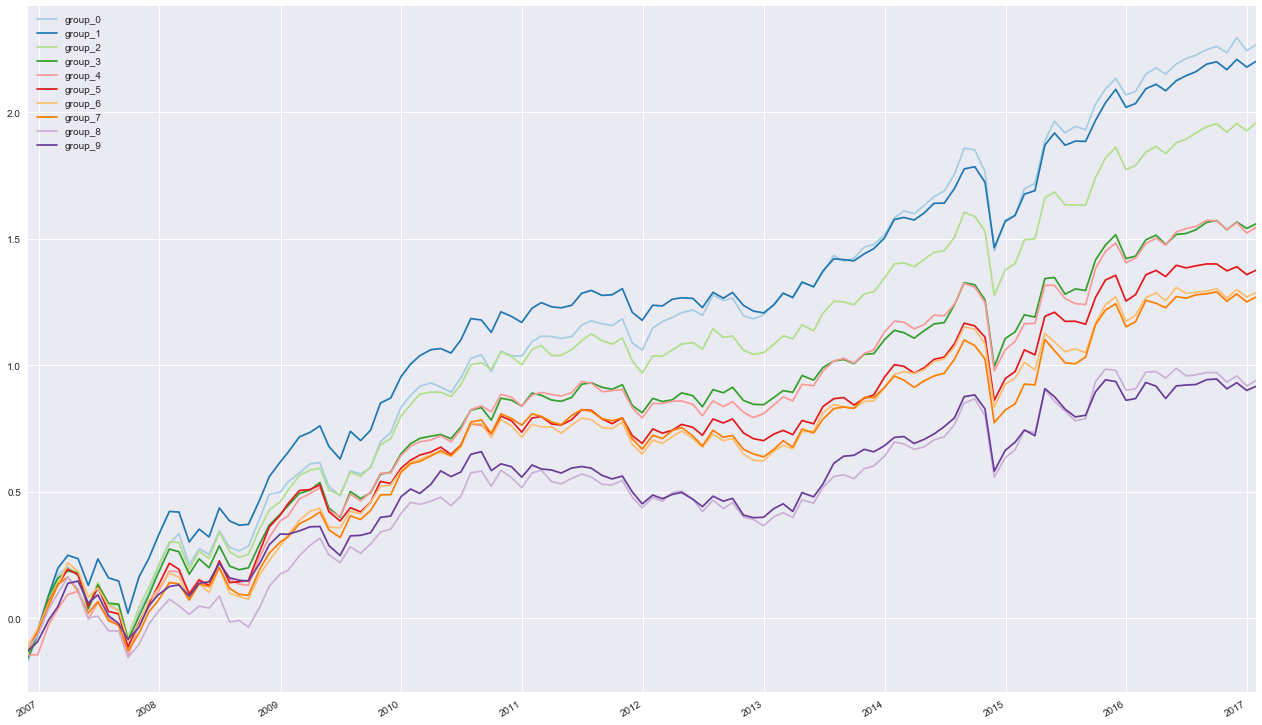

In [256]:
ReturnDF.astype(float).cumsum().plot(figsize=(22,14),color=sns.color_palette("Paired",10))

In [257]:
ReturnDF

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2006-11-30,-0.167444,-0.133002,-0.144024,-0.156607,-0.144736,-0.125562,-0.105832,-0.129566,-0.116294,-0.129366
2006-12-29,0.0971149,0.0863011,0.0844934,0.0917322,0.000493396,0.0760717,0.0630161,0.0755136,0.0475899,0.0371112
2007-01-31,0.139991,0.137261,0.126902,0.153587,0.118033,0.114262,0.102575,0.10217,0.105176,0.0849075
2007-02-28,0.100668,0.107327,0.0815895,0.069832,0.0631029,0.0666167,0.0689633,0.0855173,0.0615389,0.0535191
2007-03-30,0.0331269,0.0509428,0.0464916,0.0284014,0.057059,0.0626855,0.0901046,0.0294035,0.065021,0.0920764
2007-04-30,-0.0372848,-0.0130714,-0.0111574,-0.0082167,0.0129092,-0.0220248,-0.0332737,-0.0551951,-0.0475236,0.00862615
2007-05-31,-0.132071,-0.105863,-0.13506,-0.140339,-0.109419,-0.124589,-0.101606,-0.086833,-0.114433,-0.0859643
2007-06-29,0.0847671,0.104263,0.0922564,0.0938747,0.0649555,0.075326,0.0365245,0.0455305,0.00692604,0.0316125
2007-07-31,-0.0609244,-0.0741968,-0.0864235,-0.0724303,-0.0621488,-0.0956192,-0.0706116,-0.0756979,-0.0577687,-0.0820409
2007-08-31,-0.0276326,-0.0130616,-0.00365588,-0.00422251,-0.0289885,-0.00986139,-0.0195386,-0.0186005,-0.000264336,-0.0316873


In [258]:
ReturnForPlot =ReturnDF.copy()

In [259]:
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(x.month)) ### this shows the real time

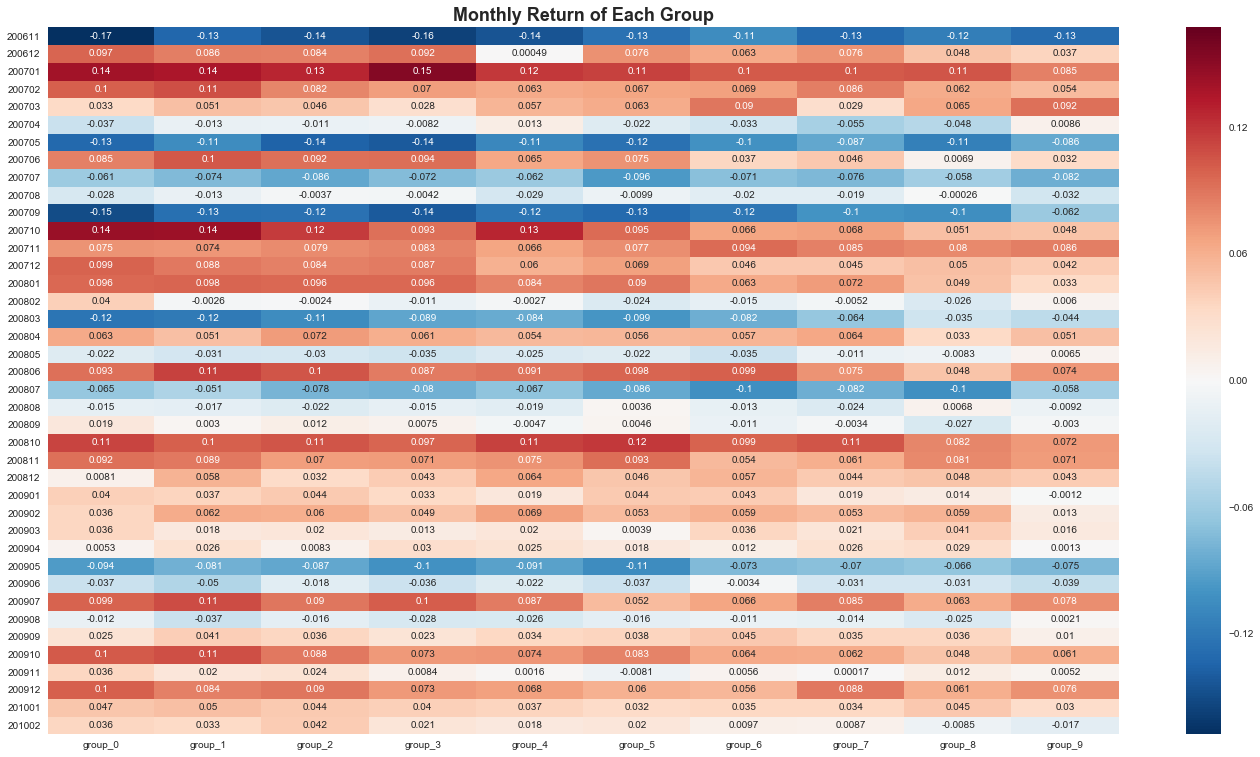

In [260]:
plt.figure(figsize=(24,13))
ax = plt.axes()
sns.heatmap(ReturnForPlot.iloc[:40].astype(float),ax=ax, annot=True)
ax.set_title('Monthly Return of Each Group',fontsize=18, fontweight='bold')
plt.show()

In [261]:
### the following part is to save return data of every factor into one Dataframe

totalGroupDict ={}
finalDF = pd.DataFrame()
countNum = 0
for i,j in filenameDict.iteritems():
    
    for date in endOfMonthList:
        factorData = ff.getData(j, timeStampNum, thresholdNum)
        factorDataTemp = factorData.loc[:date].tail()
        factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
        #print factorDataTemp
        totalGroupDict[date] = ff.getStockGroup(factorDataTemp,Mean_Num=1)
    ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None)
    for group in ReturnDF.columns.tolist():
        for time in ReturnDF.index:
            ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
    ReturnDF['factorName'] = i
    if countNum ==0:
        finalDF = ReturnDF
    else:
        finalDF=finalDF.append(ReturnDF)
    countNum+=1
finalDF.sort_index(axis=1,inplace=True)
    #totalGroupDict

In [262]:
#finalDF.shape